In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/2024-amazon-best-sellers-top-valentine-gifts/amazon_2024_valentines_best_sellers.csv


In [2]:
data = pd.read_csv("/kaggle/input/2024-amazon-best-sellers-top-valentine-gifts/amazon_2024_valentines_best_sellers.csv")

In [3]:
data.head()

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


In [4]:
data.shape

(218, 11)

In [5]:
# understanding of the data
(data.isnull().sum() / data.shape[0])*100

title                                 0.000000
brand                                 0.458716
description                          78.899083
starsBreakdown/3star                  0.000000
starsBreakdown/4star                  0.000000
starsBreakdown/5star                  0.000000
reviewsCount                          0.917431
price                               100.000000
price/currency                       22.477064
price/value                          22.477064
categoryPageData/productPosition      0.000000
dtype: float64

### Handling the null Values

In [6]:
#Dropping the null column more than 40%
data.drop(["price","description"],axis = 1, inplace = True)

In [7]:
data.head()

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,0.02,0.07,0.89,20021.0,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,0.03,0.10,0.84,18891.0,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,0.01,0.05,0.92,19395.0,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,0.07,0.15,0.67,593.0,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,0.10,0.15,0.63,816.0,$,21.99,11


In [8]:
data["price/currency"].value_counts(dropna = False)

price/currency
$      169
NaN     49
Name: count, dtype: int64

In [9]:
data[data["price/currency"].isnull()].head()

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/currency,price/value,categoryPageData/productPosition
16,I LOVE YOU Red Valentine Chocolate Dipped Oreo...,Olde Naples Chocolate,0.07,0.10,0.74,474.0,NaN,NaN,34
18,"Ferrero Collection, 12 Count, Assorted Milk an...",Ferrero Rocher,0.04,0.09,0.84,4770.0,NaN,NaN,38
20,"Marycele Candle Warmer Lamp, Electric Candle L...",Marycele,0.05,0.07,0.78,1121.0,NaN,NaN,47
24,SKITTLES Valentine's Day Wild Berry Chewy Cand...,Skittles,0.05,0.10,0.79,19772.0,NaN,NaN,30
27,EGD Acrylic Personalized Gifts Spotify Plaque ...,EGD,0.06,0.10,0.72,4717.0,NaN,NaN,25


In [10]:
data["price/currency"].fillna(data["price/currency"].mode()[0], inplace = True)

/tmp/ipykernel_18/2155358369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["price/currency"].fillna(data["price/currency"].mode()[0], inplace = True)


In [11]:
data["price/currency"].isnull().sum()

0

In [12]:
data[data["price/value"].isnull()]

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/currency,price/value,categoryPageData/productPosition
16,I LOVE YOU Red Valentine Chocolate Dipped Oreo...,Olde Naples Chocolate,0.07,0.10,0.74,474.0,$,NaN,34
18,"Ferrero Collection, 12 Count, Assorted Milk an...",Ferrero Rocher,0.04,0.09,0.84,4770.0,$,NaN,38
20,"Marycele Candle Warmer Lamp, Electric Candle L...",Marycele,0.05,0.07,0.78,1121.0,$,NaN,47
24,SKITTLES Valentine's Day Wild Berry Chewy Cand...,Skittles,0.05,0.10,0.79,19772.0,$,NaN,30
27,EGD Acrylic Personalized Gifts Spotify Plaque ...,EGD,0.06,0.10,0.72,4717.0,$,NaN,25
29,Burt's Bees Essential Everyday Beauty Valentin...,Burt's Bees,0.04,0.11,0.83,40125.0,$,NaN,39
33,Candles Gifts for Her Funny Novelty Unique Val...,BFJLIFE,0.07,0.12,0.73,316.0,$,NaN,23
36,EBMORE Womens Fuzzy Socks Slipper Soft Cabin P...,EBMORE,0.04,0.10,0.82,3214.0,$,NaN,28
38,Valentine's Day Gift Care Package (50ct) Snack...,CRAVEBOX,0.06,0.11,0.77,2637.0,$,NaN,17
39,LUCKOR Personalized Valentines Day Gifts for H...,LUCKOR,0.04,0.08,0.75,398.0,$,NaN,9


In [13]:
a = data["price/value"].mean()
b = round(a,2)
b

18.05

In [14]:
data["price/value"].fillna(b,inplace = True)

/tmp/ipykernel_18/3129108119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["price/value"].fillna(b,inplace = True)


In [15]:
data["price/value"].isnull().sum()

0

In [16]:
data.isnull().sum()

title                               0
brand                               1
starsBreakdown/3star                0
starsBreakdown/4star                0
starsBreakdown/5star                0
reviewsCount                        2
price/currency                      0
price/value                         0
categoryPageData/productPosition    0
dtype: int64

In [17]:
data1 = data[~(data.brand.isnull() | data["reviewsCount"].isnull())]

In [18]:
data1.shape

(215, 9)

In [19]:
data1.columns

Index(['title', 'brand', 'starsBreakdown/3star', 'starsBreakdown/4star',
       'starsBreakdown/5star', 'reviewsCount', 'price/currency', 'price/value',
       'categoryPageData/productPosition'],
      dtype='object')

In [20]:
data1.drop(['categoryPageData/productPosition'], axis = 1, inplace = True)

/tmp/ipykernel_18/738757908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['categoryPageData/productPosition'], axis = 1, inplace = True)


In [21]:
data1.drop(["price/currency"], axis = 1, inplace = True)

/tmp/ipykernel_18/3949488661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(["price/currency"], axis = 1, inplace = True)


In [22]:
data1.head()

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,0.02,0.07,0.89,20021.0,11.39
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,0.03,0.10,0.84,18891.0,10.69
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,0.01,0.05,0.92,19395.0,47.99
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,0.07,0.15,0.67,593.0,9.99
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,0.10,0.15,0.63,816.0,21.99


In [23]:
import warnings
warnings.filterwarnings("ignore")

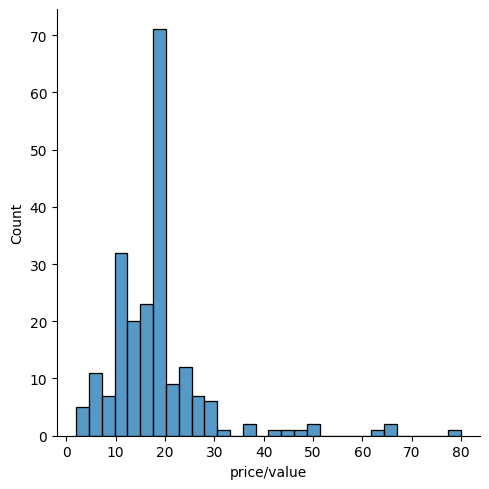

In [24]:
sns.displot(data = data1, x = "price/value", bins = 30)
plt.show()

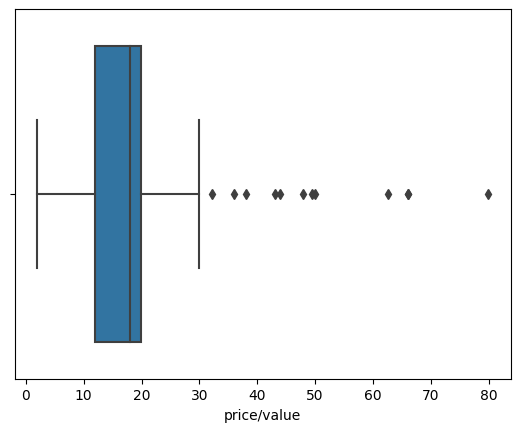

In [25]:
sns.boxplot(data = data1, x = "price/value")
plt.show()

In [26]:
data1[data["price/value"]>40]

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,0.01,0.05,0.92,19395.0,47.99
73,GLAMOUR BOUTIQUE 27-Piece Forever Flowers Hear...,GLAMOUR BOUTIQUE,0.04,0.07,0.81,559.0,79.95
105,Lebana Preserved Red Real Rose with I Love You...,Lebana,0.07,0.16,0.72,167.0,65.99
159,"Valentines Day Gifts for Her,Valentines Rose B...",Dream of Flowers,0.06,0.12,0.77,4285.0,42.99
161,NEWNOVE Valentines Day Gifts for Her - Preserv...,NEWNOVE,0.05,0.12,0.80,2379.0,43.99
179,SKPAND Handmade Romantic Gifts for Her Anniver...,SKPAND,0.05,0.13,0.77,244.0,62.66
184,Godiva Chocolatier Valentine's Day Assorted Ch...,Godiva Chocolatier,0.02,0.08,0.84,391.0,66.00
201,"Valentines Day Flowers Roses Gifts for Her,16p...",Roseshy,0.00,0.03,0.95,113.0,49.49
205,DENIMOMO Valentines Day Rose Flowers Gifts for...,DENIMOMO,0.06,0.11,0.79,178.0,49.99


In [27]:
data1['price_category'] = pd.qcut(data1['price/value'], q=3, labels=['Low', 'Medium', 'High'])


In [28]:
data1.head()

,title,brand,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,price_category
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,0.02,0.07,0.89,20021.0,11.39,Low
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,0.03,0.10,0.84,18891.0,10.69,Low
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,0.01,0.05,0.92,19395.0,47.99,High
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,0.07,0.15,0.67,593.0,9.99,Low
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,0.10,0.15,0.63,816.0,21.99,High


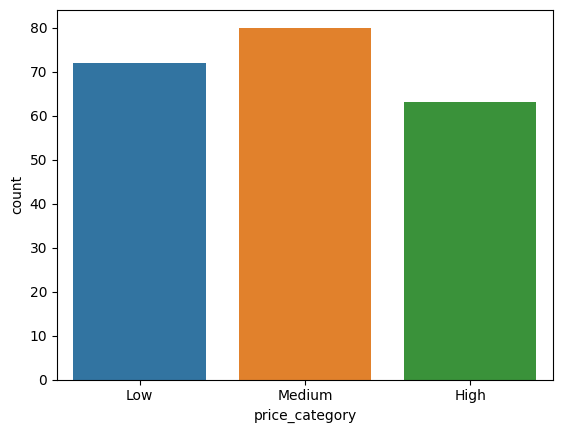

In [29]:
sns.countplot(x = "price_category", data = data1)
plt.show()

In [30]:
#top 10 review brands
top_review = data1.reviewsCount.nlargest(10)
top_brand = data1.loc[data1['reviewsCount'].isin(top_review), 'brand']
print(top_brand.unique())

['Ferrero Rocher' 'grace & stella' "Burt's Bees" 'Bazooka Candy Brands'
 'Body Restore' 'BAIMEI' 'HOME SMILE']


In [31]:
# Top 10 expensive brands
top_price = data1["price/value"].nlargest(10)
top_brand_price = data1.loc[data1['price/value'].isin(top_price), 'brand']
print(top_brand_price.unique())

['LEGO' 'GLAMOUR BOUTIQUE' 'Lebana' 'Dream of Flowers' 'NEWNOVE' 'SKPAND'
 'Godiva Chocolatier' 'Roseshy' 'DENIMOMO' 'YWHL']


In [32]:
data1.columns

Index(['title', 'brand', 'starsBreakdown/3star', 'starsBreakdown/4star',
       'starsBreakdown/5star', 'reviewsCount', 'price/value',
       'price_category'],
      dtype='object')

<Axes: xlabel='price/value', ylabel='reviewsCount'>

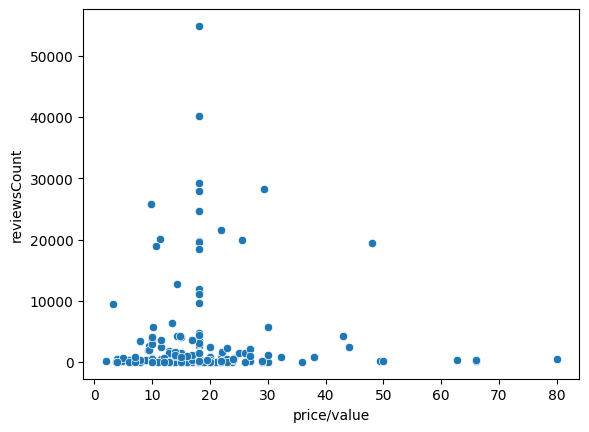

In [33]:
sns.scatterplot(data=data1, x="price/value", y="reviewsCount")


In [34]:
data1.columns

Index(['title', 'brand', 'starsBreakdown/3star', 'starsBreakdown/4star',
       'starsBreakdown/5star', 'reviewsCount', 'price/value',
       'price_category'],
      dtype='object')

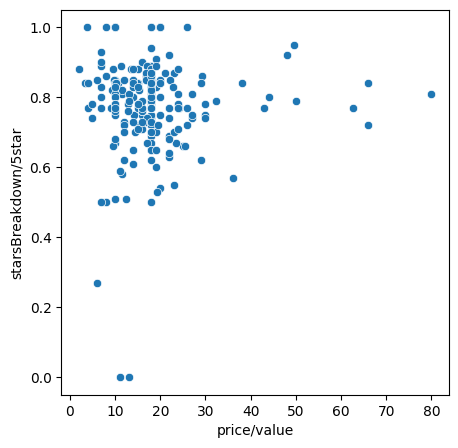

In [35]:
plt.figure(figsize =(5,5))
sns.scatterplot(data=data1, x='price/value', y='starsBreakdown/5star')
plt.show()


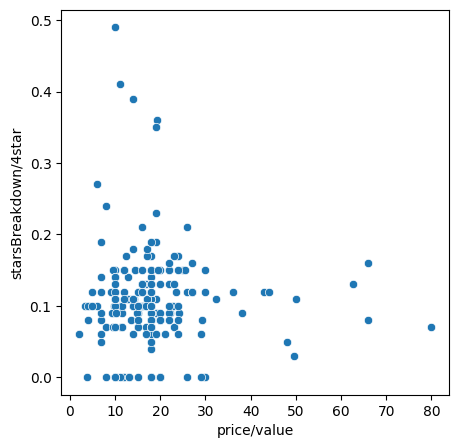

In [36]:
plt.figure(figsize =(5,5))
sns.scatterplot(data=data1, x='price/value', y='starsBreakdown/4star')
plt.show()


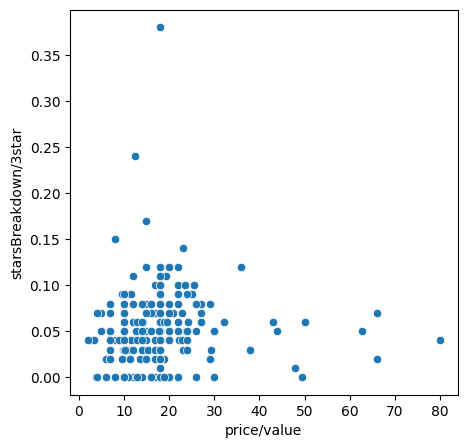

In [37]:
plt.figure(figsize =(5,5))
sns.scatterplot(data=data1, x='price/value', y='starsBreakdown/3star')
plt.show()


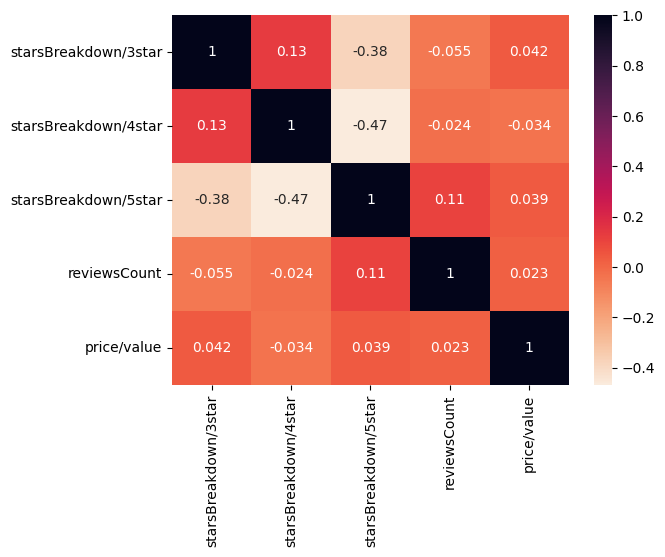

In [38]:
res = data1[['starsBreakdown/3star', 'starsBreakdown/4star','starsBreakdown/5star', 'reviewsCount', 'price/value']].corr()
sns.heatmap(res, annot = True, cmap = "rocket_r")
plt.show()

# Final Insight
- Consumers tend to favor products priced between 10 and 20 dollar.
- These brands are particularly popular due to their higher review counts, indicating greater consumer usage   Ferrero Rocher, Grace & Stella, Burt's Bees, Bazooka Candy Brands, Body Restore, BAIMEI, and HOME SMILE."
- Among the listed brands, LEGO, GLAMOUR BOUTIQUE, Lebana, Dream of Flowers, NEWNOVE, SKPAND, Godiva      Chocolatier, Roseshy, DENIMOMO, and YWHL fall into the category of expensive brands."
- It's worth noting that a higher price for a product doesn't necessarily gurantee with higher 5star counts."




